In [172]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
PATH_DATA = "../../../data/"

In [178]:
def read_data(filename):
    # 'radius.log.1'
    with open(PATH_DATA + filename, 'rb') as f:
        rows = f.readlines()
    rows = [str(row)[2:][:-3] for row in tqdm(rows)]
    return rows

In [135]:
with open(PATH_DATA + 'radius.log.9', 'rb') as f:
    rows_9 = f.readlines()

rows_9 = [str(row)[2:][:-3] for row in tqdm(rows_9)]

In [5]:
len_date = len("Apr 30 00:11:25")
print(len_date)

15


In [83]:
def unlist(x: list):
    if len(x) > 0:
        return x[0]
    else:
        return ''

In [165]:
re.findall(r'radiusd: \[\w+\] ([\w+|-|_|-]+)', row)

['Billing-Accounting']

In [182]:
def parse_data(rows): 
    columns = [
        'date', 'rad/nfs', 'radiusd', 'type_', 'id_сессии', 'flag_мастер_сессия',
        'сессия_аккаунтинга_направления', 'логин_абонента', 'ip_абонента', 'mac_абонента',
        'БРАС-1/2', 'delay'
    ]
    res_parse = []

    for row in tqdm(rows):
        date = row[:len_date]
        rad_nfs = row[(len_date+1): (len_date+4)]
        radiusd = unlist(re.findall(r'radiusd: \[(\w+)\]', row))
        type_ = unlist(re.findall(r'radiusd: \[\w+\] ([\w+|-|_|-]+)', row))
        ulsk = re.findall(r'ULSK-(\w+)', row)
        flg_master_session = "RADIUS,," in row
        session_accountinga_napravlenia = unlist(re.findall(r'RADIUS,(\d),', row))
        login_abonenta = unlist(re.findall(r"'(.+)' via", row))
        ip_abonent = unlist(re.findall(r", (\d+.\d+.\d+.\d+), ", row))
        mac_abonent = unlist(re.findall(r", (\w+:\w+:\w+:\w+:\w+:\w+)\) ", row))
        bras_1_2 = unlist(re.findall(r"89.239.189.1|89.239.189.2", row))
        delay = unlist(re.findall(r"delay (\d+\.\d+)", row))

        res_parse.append([
            date, rad_nfs, radiusd, type_, ulsk, flg_master_session, session_accountinga_napravlenia,
            login_abonenta, ip_abonent, mac_abonent, bras_1_2, delay
        ])
        
    df_ = pd.DataFrame(res_parse, columns=columns)
    return df_

In [ ]:
res_parse_dfs = []
for i in range(1, 10):
    filename = f'radius.log.{i}'
    print(filename)
    rows = read_data(filename)
    res_parse_dfs.append(parse_data(rows))
res_parse_df = pd.concat(res_parse_dfs)

radius.log.1


Text(0.5, 1.0, 'delay')

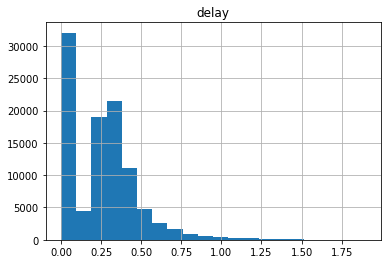

In [174]:
pd.Series([0 if x == '' else float(x) for x in df['delay']]).hist(bins=20)
plt.title('delay')

In [176]:
df['type_'].value_counts()

Billing-Accounting                77616
huawei_save_sessid                18317
Billing-Authentication             3928
ora_access                           78
Billing                              30
Billing_Rad2Rad-Authentication       11
                                      8
Billing-COA-Request                   4
1                                     4
COA-ACK                               4
Name: type_, dtype: int64

In [167]:
df = pd.DataFrame(res_parse, columns=columns)
df.head()

,date,rad/nfs,radiusd,type_,id_сессии,flag_мастер_сессия,сессия_аккаунтинга_направления,логин_абонента,ip_абонента,mac_абонента,БРАС-1/2,delay
0,Apr 30 00:11:25,rad,17626,Billing-Accounting,"[BR152331598000004a2463043502, B41033SSG000003...",False,4,9usLLsvL-Wg@dhcp,89.239.189.1,ec:4c:4d:ae:a7:30,89.239.189.1,0.211458
1,Apr 30 00:11:26,nfc,16233,Billing-Accounting,"[BR09232112900000f15744056293, B07232SSG000003...",False,4,AAHvH8-W@pppoe,89.239.189.2,c4:6e:1f:44:36:6c,89.239.189.2,0.128042
2,Apr 30 00:11:25,rad,03402,huawei_save_sessid,[B04230SSG000003e90bb7217311],False,,,,,,
3,Apr 30 00:11:26,nfc,16343,Billing-Accounting,"[BR09232039100000d66624053175, B35032SSG000004...",False,5,9usLtigW-9t@dhcp,89.239.189.1,ec:4c:4d:f0:3c:bb,89.239.189.1,0.296358
4,Apr 30 00:11:25,rad,17553,Billing-Accounting,"[BR09232039100000d66624053175, B35032SSG000002...",False,3,9usLtigW-9t@dhcp,89.239.189.1,ec:4c:4d:f0:3c:bb,89.239.189.1,0.282959


In [148]:
for i in rows[:20]:
    print()
    print(str(i))


Apr 30 00:11:25 rad radiusd: [17626] Billing-Accounting: 117/0 '9usLLsvL-Wg@dhcp' via radius@startip_nn - OK -- input (2020.04.30 00:11:25,89.239.189.1:253892158,Virtual-Access,Framed,PPP,Alive,ULSK-BR152331598000004a2463043502,RADIUS,4,ec:4c:4d:ae:a7:30,92.252.187.91,0,315000,13958,750386, 89.239.189.1, \\0x01\\0\\0\\0x160A499459, ULSK-B41033SSG0000035ccd3f043502, ULSK-BR152331598000004a2463043502, ec:4c:4d:ae:a7:30) delay 0.211458

Apr 30 00:11:26 nfc radiusd: [16233] Billing-Accounting: 204/0 'AAHvH8-W@pppoe' via radius@startip_nn - OK -- input (2020.04.30 00:11:25,89.239.189.2:153224297,Virtual-Access,Framed,PPP,Alive,ULSK-BR09232112900000f15744056293,RADIUS,4,1380169-HDSLAM56-DD-ATS2-2 atm 0/12/0/57:0.33,92.252.235.144,0,60000,168587,1109056, 89.239.189.2, 1380169-HDSLAM56-DD-ATS2-2 atm 0/12/0/57:0.33, ULSK-B07232SSG000003c08e7d056293, ULSK-BR09232112900000f15744056293, c4:6e:1f:44:36:6c) delay 0.128042 

Apr 30 00:11:25 rad radiusd: [03402] huawei_save_sessid: added 9ba05a8 ULSK